In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = '/content/drive/MyDrive/DataSet/중간데이터.csv'
data = pd.read_csv(df, sep=',')
data

,Unnamed: 0,기준연도,행정구역시도코드,행정구역시군구코드,행정구역읍면동코드,사업체대표자성별코드,창설연도,창설월,조직형태코드,사업체구분코드,...,건물_합계면적,일일평균영업시간코드,온라인쇼핑거래존재여부,전체매출액_온라인쇼핑거래액비중,디지털플랫폼이용여부,무인결제기기도입여부,객석여부,객석수,배달택배판매여부,대량대체여부
0,0,2020.0,11,10,53,1.0,1992.0,11.0,1,NaN,...,190.0,5,2,NaN,2,2,1,130.0,1,N
1,1,2020.0,11,10,53,1.0,1994.0,12.0,1,NaN,...,50.0,2,1,1.0,1,2,1,30.0,1,N
2,2,2020.0,11,10,53,1.0,1994.0,5.0,1,NaN,...,116.0,2,2,NaN,2,2,2,NaN,2,Y
3,3,2020.0,11,10,53,1.0,1996.0,11.0,2,1.0,...,43.0,4,1,8.0,1,1,1,16.0,1,N
4,4,2020.0,11,10,53,1.0,1997.0,5.0,1,NaN,...,72.0,2,2,NaN,2,2,1,19.0,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804145,804145,2020.0,39,20,62,2.0,2020.0,7.0,1,NaN,...,17.0,4,2,NaN,2,2,2,NaN,2,Y
804146,804146,2020.0,39,20,62,2.0,2020.0,7.0,1,NaN,...,660.0,5,2,NaN,2,2,1,80.0,2,N
804147,804147,2020.0,39,20,62,2.0,2020.0,8.0,1,NaN,...,50.0,2,2,NaN,2,2,1,11.0,2,Y
804148,804148,2020.0,39,20,62,2.0,2020.0,8.0,1,NaN,...,33.0,1,1,40.0,1,2,1,24.0,2,N


In [3]:
data['임차료'] = data['임차료'].fillna(data['임차료'].mode()[0])

In [4]:
data['임차료'].describe()

count    804150.000000
mean         13.051779
std          31.147862
min           0.000000
25%           0.000000
50%           6.000000
75%          16.000000
max        6324.000000
Name: 임차료, dtype: float64

In [5]:
data['광고선전비'] = data['광고선전비'].fillna(data['광고선전비'].mode()[0])

In [6]:
data['광고선전비'].describe()

count    804150.000000
mean          1.394362
std          10.080890
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        3504.000000
Name: 광고선전비, dtype: float64

In [13]:
data['임차료'].value_counts()

0.0       240992
6.0        35225
4.0        33681
5.0        33233
1.0        30177
           ...  
479.0          1
706.0          1
668.0          1
866.0          1
1092.0         1
Name: 임차료, Length: 673, dtype: int64

In [15]:
data['광고선전비'].value_counts()

0.0      550661
1.0      130139
2.0       36579
3.0       22679
4.0       13658
          ...  
247.0         1
464.0         1
711.0         1
398.0         1
581.0         1
Name: 광고선전비, Length: 325, dtype: int64

<Axes: xlabel='광고선전비', ylabel='Density'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  func(*ar

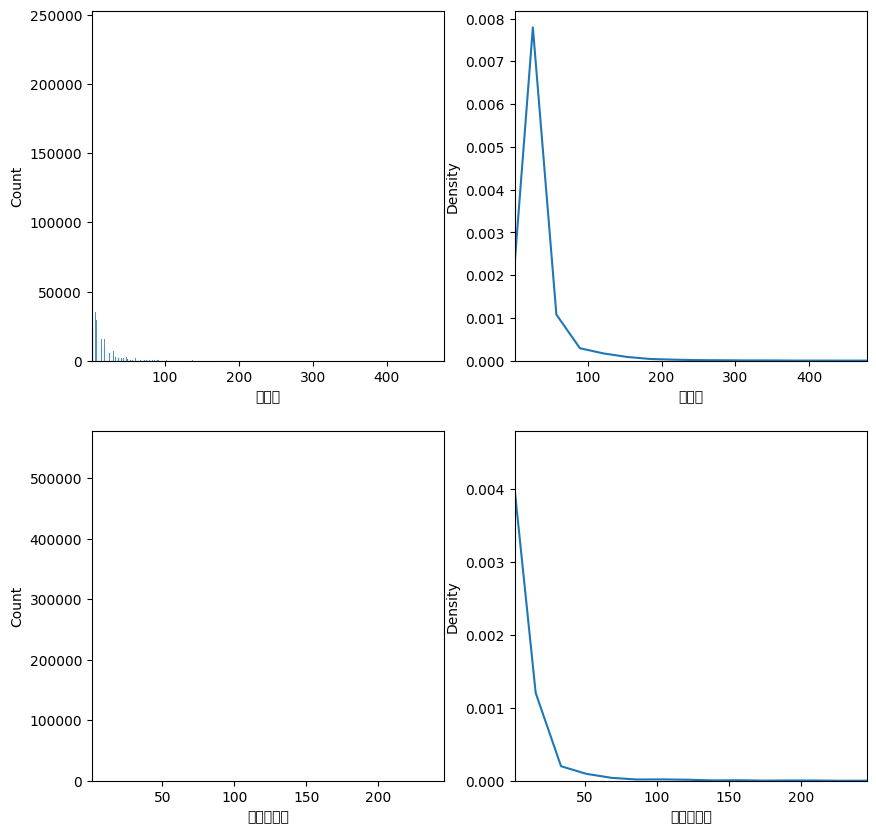

In [16]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.xlim(1, 478)
sns.histplot(data=data, x=data['임차료'])

plt.subplot(2, 2, 2)
plt.xlim(1, 478)
sns.kdeplot(data=data, x=data['임차료'])

plt.subplot(2, 2, 3)
plt.xlim(1, 246)
sns.histplot(data=data, x=data['광고선전비'])

plt.subplot(2, 2, 4)
plt.xlim(1, 246)
sns.kdeplot(data=data, x=data['광고선전비'])

<Axes: xlabel='광고선전비', ylabel='Density'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  func(*ar

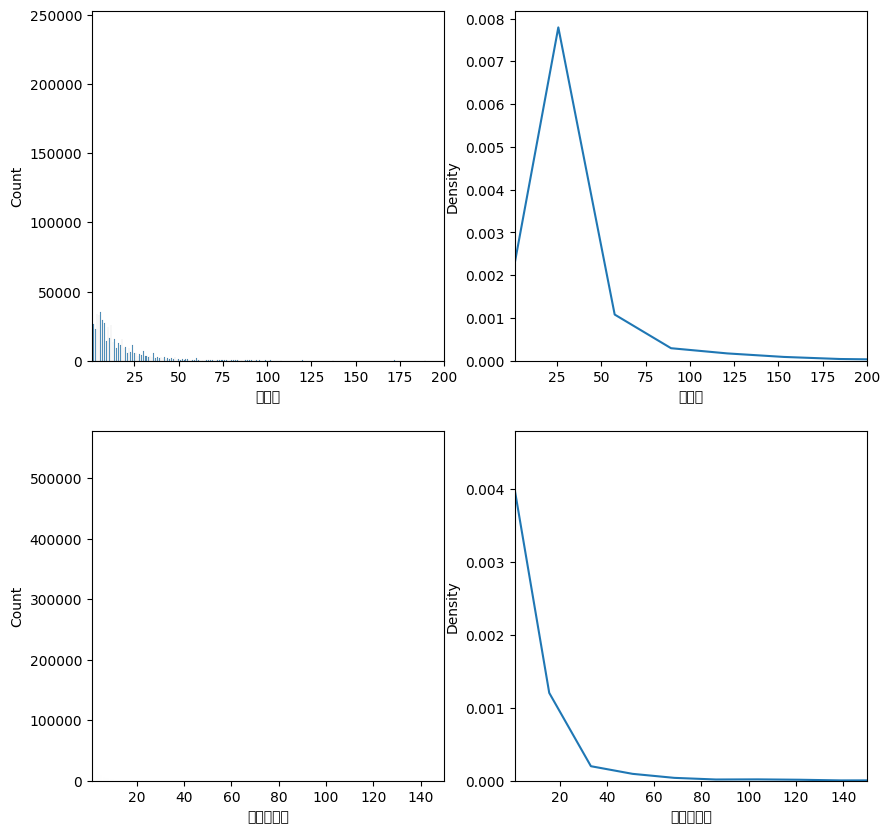

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.xlim(1, 200)
sns.histplot(data=data, x=data['임차료'])

plt.subplot(2, 2, 2)
plt.xlim(1, 200)
sns.kdeplot(data=data, x=data['임차료'])

plt.subplot(2, 2, 3)
plt.xlim(1, 150)
sns.histplot(data=data, x=data['광고선전비'])

plt.subplot(2, 2, 4)
plt.xlim(1, 150)
sns.kdeplot(data=data, x=data['광고선전비'])

<Axes: xlabel='광고선전비', ylabel='Density'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  func(*ar

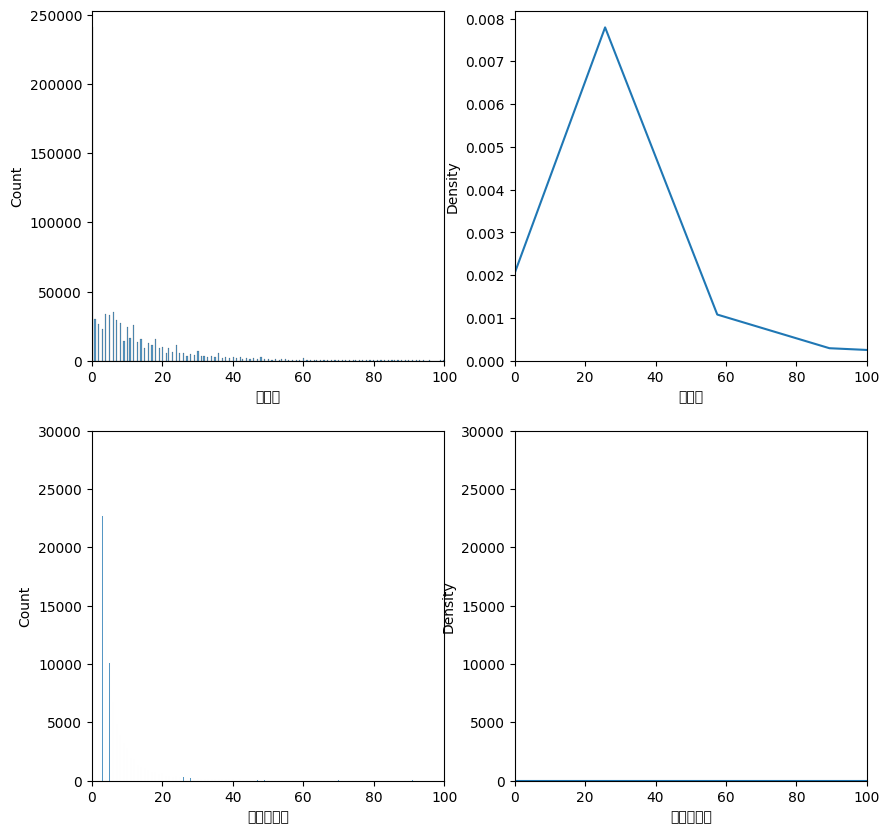

In [8]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.xlim(0, 100)
sns.histplot(data=data, x=data['임차료'])

plt.subplot(2, 2, 2)
plt.xlim(0, 100)
sns.kdeplot(data=data, x=data['임차료'])

plt.subplot(2, 2, 3)
plt.xlim(0, 100)
plt.ylim(0, 30000)
sns.histplot(data=data, x=data['광고선전비'])

plt.subplot(2, 2, 4)
plt.xlim(0, 100)
plt.ylim(0, 30000)
sns.kdeplot(data=data, x=data['광고선전비'])